##### This notebook is the model built by using Gradient Boost, to predict the Flag category of the top 25% SKU's from the dataset, the output is 99.9% accuracy. 

In [1]:
# basic import statements
import os
import re
import gc
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
warnings.filterwarnings("ignore")
from datetime import date 

#set max display in notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Show multiple output in console
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Import the Dataset of top 25% of the SKU's 
df = pd.read_csv('new_data_analysed_top25%.csv')
df.shape
df.dtypes
df.head()

(6171281, 22)

sku                       object
condition                 object
size                      object
gender                    object
sold_at                   object
sold_price               float64
source                    object
size_value               float64
brand                     object
name                      object
colorway                  object
color                     object
silhouette                object
retailprice              float64
releasedate               object
is_collab                 object
collaborator              object
quarter                  float64
average_sold_price       float64
sku_count                float64
percentage_difference    float64
resale_flag               object
dtype: object

,sku,condition,size,gender,sold_at,sold_price,source,size_value,brand,name,colorway,color,silhouette,retailprice,releasedate,is_collab,collaborator,quarter,average_sold_price,sku_count,percentage_difference,resale_flag
0,DD1399-101,is_new,7.5,men,2021-12-13,236.0,stockx,7.5,Nike,Nike Dunk High Syracuse (2021),White/Orange Blaze,white,Dunk,110.0,2021-03-10,False,NaN,4.0,197.367568,2.0,79.425061,Substantial Resale Premium
1,BQ7666-100,is_new,10,men,2021-07-12,169.0,stockx,10.0,Jordan,Jordan 8 SP Retro SE White Multicolor,White/Black-Red Orbit,white,Air Jordan 8,225.0,2019-09-18,False,NaN,3.0,160.363636,280.0,-28.727273,Discounted Resale
2,CK7214-100,is_new,11.5,men,2021-08-02,140.0,stockx,11.5,Nike,Nike Air Force 1 Low '07 LV8 White,White/White/White,white,Air Force 1,110.0,2020-07-20,False,NaN,3.0,120.000000,12.0,9.090909,Negligible Resale Premium
3,BQ6806-115,is_new,7,men,2021-06-21,123.0,stockx,7.0,Nike,Nike Blazer Mid 77 Vintage Pine Green,White/Pine Green,white,Blazer,100.0,2021-01-22,False,NaN,2.0,118.636364,49.0,18.636364,Negligible Resale Premium
4,DD9678-100,is_new,10,men,NaN,133.0,alias,10.0,Nike,Nike Air Max 90 Burlap,White/Cream-Burlap,cream,Air Max 90,120.0,2021-03-09,False,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# convert sold_at to date format
df['sold_at'] = pd.to_datetime(df['sold_at'], format='%Y-%m-%d', errors='coerce')
df.dtypes

sku                              object
condition                        object
size                             object
gender                           object
sold_at                  datetime64[ns]
sold_price                      float64
source                           object
size_value                      float64
brand                            object
name                             object
colorway                         object
color                            object
silhouette                       object
retailprice                     float64
releasedate                      object
is_collab                        object
collaborator                     object
quarter                         float64
average_sold_price              float64
sku_count                       float64
percentage_difference           float64
resale_flag                      object
dtype: object

### Gradient Boost

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [70]:
X = df.dropna(subset=['resale_flag'])
y = X['resale_flag']
X = X.drop(columns=['resale_flag'])

In [57]:
# Define numerical and categorical features
numerical_features = ['sold_price', 'retailprice', 'quarter', 'average_sold_price', 'percentage_difference','size_value']
categorical_features = ['condition', 'gender', 'brand']

In [71]:
# Step 1: Handling missing values in X (Features)
# Define numerical and categorical features in X
X_numerical = X[numerical_features]
X_categorical = X[categorical_features]

In [72]:
# Preprocessing for numerical features in X
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [73]:
# Preprocessing for categorical features in X
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [74]:
# Combine preprocessing for numerical and categorical features in X
preprocessor_X = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [62]:
y_encoded = pd.get_dummies(y)

In [64]:
y_encoded

,Discounted Resale,Exceptional Resale Premium,Mild Resale Premium,Moderate Resale Premium,Negligible Resale Premium,Retail Price Resale,Substantial Resale Premium,Unknown
0,False,False,False,False,False,False,True,False
1,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6171276,False,False,False,True,False,False,False,False
6171277,False,False,True,False,False,False,False,False
6171278,True,False,False,False,False,False,False,False
6171279,True,False,False,False,False,False,False,False


In [75]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Initialize the GradientBoostingClassifier
model = GradientBoostingClassifier()

In [76]:
# Fit the model using preprocessed X_train and y_train data
model.fit(preprocessor_X.fit_transform(X_train), y_train)

GradientBoostingClassifier()

In [77]:
y_pred = model.predict(preprocessor_X.transform(X_test))

In [78]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9999834149577569


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Actual', ylabel='Predicted'>

Text(0.5, 1.0, 'Actual vs. Predicted Sold Price')

Text(0.5, 0, 'Actual Sold Price')

Text(0, 0.5, 'Predicted Sold Price')

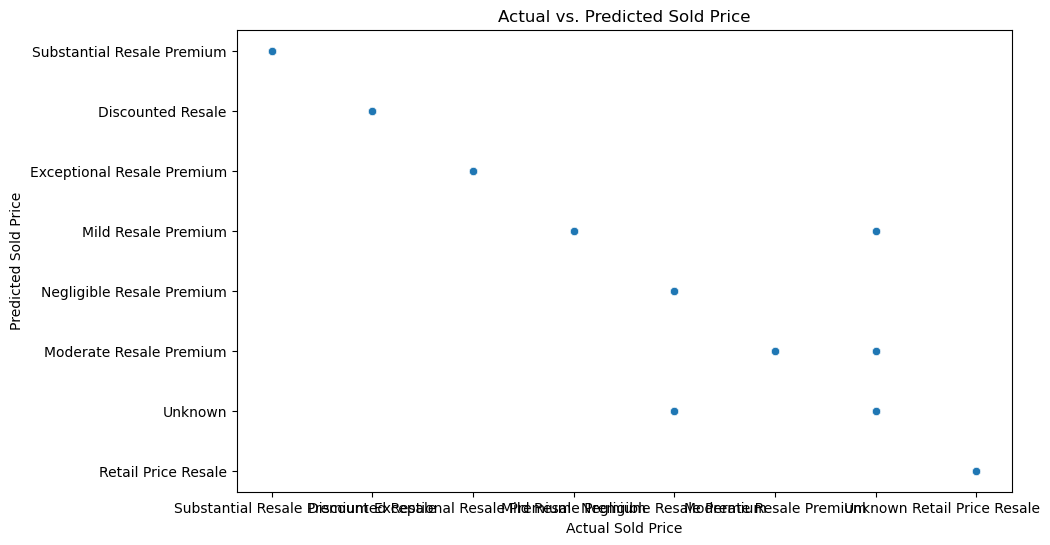

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Assuming preprocessor_X is your data preprocessor
# Assuming X_test and y_test are your test dataset and corresponding target values
# Assuming y_pred contains the predicted values

# Make predictions on the test set
y_pred = model.predict(preprocessor_X.transform(X_test))

# Create a DataFrame containing the actual and predicted values for soldprice
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot actual vs. predicted values
plt.figure(figsize=(10, 10))
sns.scatterplot(data=results_df, x='Actual', y='Predicted')
plt.title('Actual vs. Predicted Sold Price')
plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')
plt.show()

In [80]:
results_df.head()

,Actual,Predicted
2928456,Substantial Resale Premium,Substantial Resale Premium
590253,Discounted Resale,Discounted Resale
4954115,Exceptional Resale Premium,Exceptional Resale Premium
4529399,Mild Resale Premium,Mild Resale Premium
5558350,Negligible Resale Premium,Negligible Resale Premium


<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='Actual', ylabel='Predicted'>

Text(0.5, 1.0, 'Actual vs. Predicted Sold Price')

Text(0.5, 0, 'Actual Sold Price')

Text(0, 0.5, 'Predicted Sold Price')

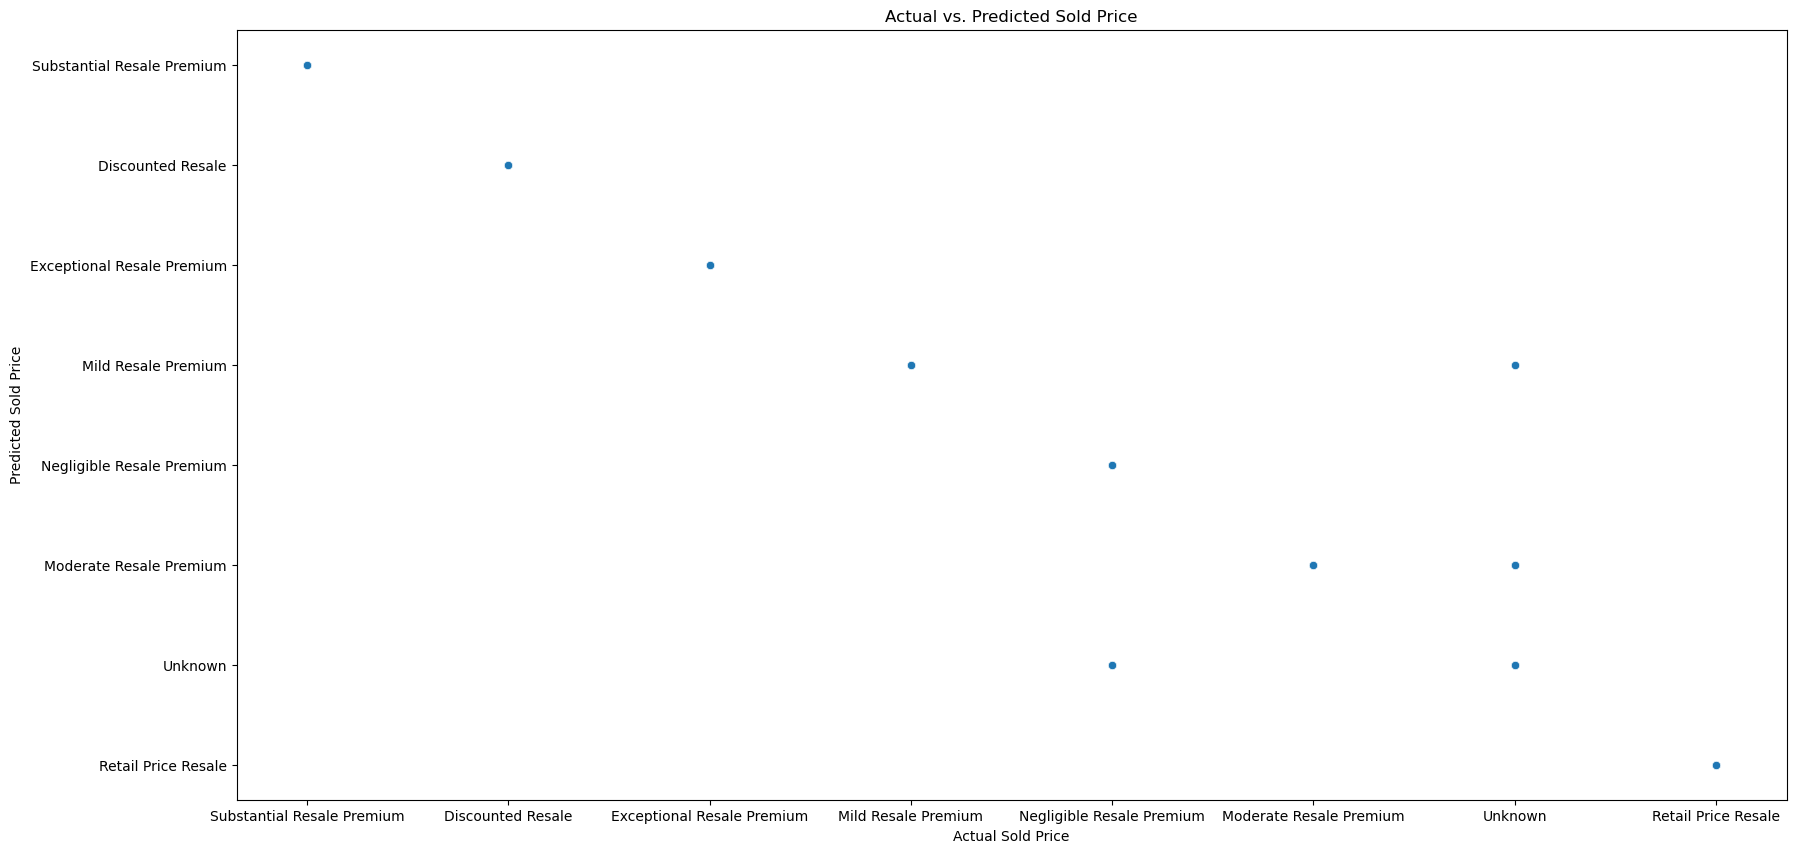

In [83]:
# Plot actual vs. predicted values
plt.figure(figsize=(20, 10))
sns.scatterplot(data=results_df, x='Actual', y='Predicted')
plt.title('Actual vs. Predicted Sold Price')
plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')
plt.show()

In [84]:
# Create a DataFrame containing the actual and predicted values for soldprice
results_df_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Add columns from the test dataset to the results DataFrame
results_df_1 = pd.concat([X_test.reset_index(drop=True), results_df], axis=1)

results_df_1.shape
results_df_1.head()

(1879632, 23)

,sku,condition,size,gender,sold_at,sold_price,source,size_value,brand,name,colorway,color,silhouette,retailprice,releasedate,is_collab,collaborator,quarter,average_sold_price,sku_count,percentage_difference,Actual,Predicted
0,DD1391-600,is_new,6.5,men,2021-11-01,183.0,stockx,6.5,Nike,Nike Dunk Low Championship Red (2021),University Red/White-Total Orange,red,Dunk,100.0,2021-09-28,False,NaN,4.0,190.535912,66.0,90.535912,Substantial Resale Premium,Substantial Resale Premium
1,DA8736-101,is_new,7.5W,women,2021-08-09,93.0,stockx,7.5,Nike,Nike Blazer Mid Leopard (Women's),White/White-Leopard,white,Blazer,100.0,2021-02-11,False,NaN,3.0,77.980000,146.0,-22.020000,NaN,NaN
2,DD3235-100,is_new,6.5Y,child,2021-06-06,244.0,stockx,6.5,Jordan,Jordan 1 Mid Grey Camo (GS),White/Photon Dust-Grey-Fog,grey,Air Jordan 1,105.0,2020-09-02,False,NaN,2.0,267.122807,625.0,154.402673,NaN,NaN
3,CU6015-700,is_new,4,men,2021-10-02,303.0,stockx,4.0,Nike,Nike Air Rubber Dunk Off-White University Gold,University Gold/University Gold-Black,yellow,Air Rubber Dunk,180.0,2020-10-01,False,NaN,4.0,261.625000,100.0,45.347222,NaN,NaN
4,CU1816-100,is_new,7.5,men,2021-04-28,157.0,stockx,7.5,Nike,Nike Air Max 90 NRG Bacon (2021),Sail-Sheen-Straw-Medium Brown,brown,Air Max 90,140.0,2021-03-26,False,NaN,2.0,166.923767,201.0,19.231262,NaN,NaN


In [93]:
columns_to_consider = ['Actual']
results_clean = results_df_1.dropna(subset='Actual')

In [94]:
results_clean.shape
results_clean.head()

(1025020, 23)

,sku,condition,size,gender,sold_at,sold_price,source,size_value,brand,name,colorway,color,silhouette,retailprice,releasedate,is_collab,collaborator,quarter,average_sold_price,sku_count,percentage_difference,Actual,Predicted
0,DD1391-600,is_new,6.5,men,2021-11-01,183.0,stockx,6.5,Nike,Nike Dunk Low Championship Red (2021),University Red/White-Total Orange,red,Dunk,100.0,2021-09-28,False,NaN,4.0,190.535912,66.0,90.535912,Substantial Resale Premium,Substantial Resale Premium
10,DJ1199-400,is_new,9W,women,2021-05-27,201.0,stockx,9.0,Jordan,Jordan 1 High Zoom Air CMFT Aleali May Califia...,Royal/Green,blue,Air Jordan 1 Zoom,140.0,2021-04-26,False,NaN,2.0,216.511765,60.0,54.651261,Discounted Resale,Discounted Resale
16,H05790,is_new,10,men,2021-06-01,144.0,stockx,10.0,adidas,adidas ZX 1000 The Simpsons Flaming Moes,Purple/Orange/Red,white,ZX 1000,120.0,2021-05-12,False,NaN,2.0,147.945205,25.0,23.287671,Discounted Resale,Discounted Resale
17,CD2451-001,is_new,12.5,men,2021-02-09,148.0,stockx,12.5,Nike,Nike LeBron 16 Glow,Black/Black-Glow,black,LeBron 16,200.0,2019-05-17,False,NaN,1.0,148.500000,16.0,-25.750000,Substantial Resale Premium,Substantial Resale Premium
18,BQ6472-015,is_new,8.5W,women,2021-10-08,158.0,stockx,8.5,Jordan,Jordan 1 Mid Light Smoke Grey (Women's),White/Light Smoke Grey,white,Air Jordan 1,120.0,2021-10-11,False,NaN,4.0,213.977394,30.0,78.314495,Discounted Resale,Discounted Resale


In [92]:
df['resale_flag'].isnull().values.sum()

1046183